# Neural & Behavioral Modeling - Week 16 (Exercises)
趙冠豪 (ntueeb05howard@gmail.com)

In [63]:
%config IPCompleter.greedy=True 
%matplotlib inline
from matplotlib.pyplot import *
from IPython.display import *
import numpy as np

## 1 Integrate-and-Fire Neuron with A Refractory Period (5 points)

Please modify the leaky integrate-and-fire model to produce the following dynamics showing <a href="https://en.wikipedia.org/wiki/Refractory_period_(physiology)">refractory/inactivation periods</a> like the following:

<img src="https://courses.cit.cornell.edu/ece5990/ECE5725_Fall2017_projects/aj373_ssd56_website/images/centerLED.png" width=70%>

Unlike the above figure, you need to produce "spikes" in your implementation.

### 1.0 The Leaky Integrate-and-Fire Model

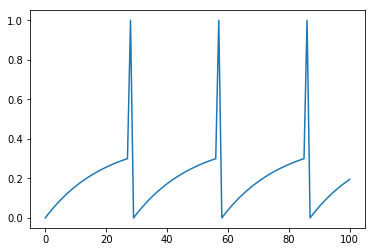

In [64]:
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

dt=.1; V=[Vrst];
for t in np.arange(0,10,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*Vrst+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V.append(V2)

plot(V);

### 1.1 Your modified I-F model

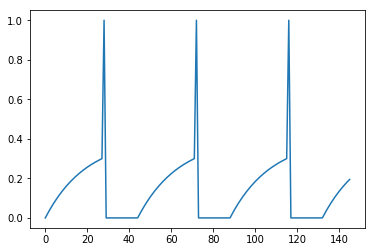

In [65]:
# Please write your codes here.
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

dt=.1; V=[Vrst];
for t in np.arange(0,10,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*Vrst+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V.append(V2)
    if s is True:
        for i in range(15):
            V.append(0)

plot(V);

### refactory period with slightly going down

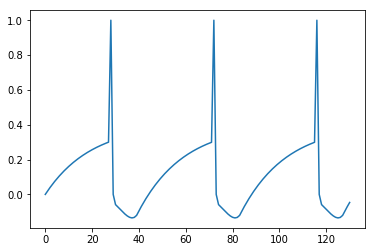

In [66]:
# Please write your codes here.
I=2;g=5;C=10;Vrst=0;Vthr=.3;Vspk=1;

dt=.1; V=[Vrst];
for t in np.arange(0,10,dt):
    V1=V[-1] # the last element
    s=V1>Vthr; # An implicit IF-THEN hack
    V2=s*Vrst+(1-s)*(V1+dt/C*(-g*V1+I)) # Euler integration
    V1=s*Vspk+(1-s)*V1 # Spiking now?
    V[-1]=V1; V.append(V2)
    if s is True:
        for i in range(8,18):
            i = i*0.1*0.5
            y = i**7 - 2*i**2 + i**4
            V.append(0.2*y)

plot(V);

## 2 The Hodgkin–Huxley Model (5 points)
Please read P.19, P.20, & P.21 of the article by <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1392413/pdf/jphysiol01442-0106.pdf">Hodgkin & Huxley (1952)</a>
to implement the very original Hodgkin–Huxley model using their equations and parameters.

### 2.0 Modern implementation of the H-H model

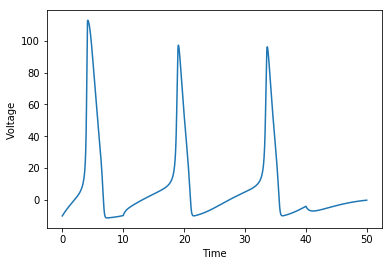

In [70]:
# Integration of Hodgkin--Huxley equations with Euler method
g=np.array([36, 120, 0.3]) # Maximal conductances (in units of mS/cm^2); 1=K, 2=Na, 3=l
E=np.array([-12, 115, 10.613]) # Resting potentials (in mV):
# Some initializations: some variables
gnmh=np.zeros(3); Alpha=np.zeros(3); Beta=np.zeros(3); x=np.zeros(3); 
x[2]=1; I_ext=0; V=[-10]; dt=0.01; 

tspan=np.arange(0,50,dt)
for t in tspan:
    
    V1=V[-1] # the last element
    if(t>=10 and t<=40):
        I_ext=10  # turns external current on when t=[10,40]
    else:  
        I_ext=0   
        
  # alpha functions:
    Alpha[0]=0.01*(10-V1)/(np.exp((10-V1)/10)-1)
    Alpha[1]=0.1*(25-V1)/(np.exp((25-V1)/10)-1)
    Alpha[2]=0.07*np.exp(-V1/20)
    
  # beta functions:
    Beta[0]=0.125*np.exp(-V1/80)
    Beta[1]=4*np.exp(-V1/18)
    Beta[2]=1/(np.exp((30-V1)/10)+1)
    
  # tau_x and x_0 (x=0,1,2) are defined with alpha and beta
    tau=1/(Alpha+Beta);
    x_inf=Alpha*tau;
    x=x+dt*(x_inf-x)/tau;
    
  # calculate actual conductances g with given n, m, h
    gnmh[0]=g[0]*x[0]**4;
    gnmh[1]=g[1]*x[1]**3*x[2];
    gnmh[2]=g[2];
    
  # Ohm's law
    I=gnmh*(V1-E);
    V2=V1+dt*(I_ext-sum(I))
    V.append(V2)
    
plot(tspan,V[:-1]); 
xlabel('Time'); ylabel('Voltage');

### 2.1 Your implementation of the original H-H model

### I use different way to model H-H model and get the same result.

In [71]:
import scipy as sp
import pylab as plt
from scipy.integrate import odeint
from scipy import stats
import scipy.linalg as lin

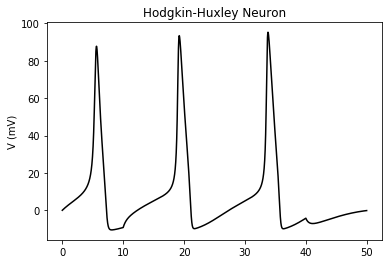

In [72]:
# Constants
C_m  =   1.0 # membrane capacitance, in uF/cm^2
g_Na = 120.0 # maximum conducances, in mS/cm^2
g_K  =  36.0
g_L  =   0.3
E_Na =  115 # Nernst reversal potentials, in mV
E_K  =  -12
E_L  = 10.613

# Channel gating kinetics
# Functions of membrane voltage
def alpha_m(V): return 0.1*(-V+25.0)/(sp.exp((-V+25.0) / 10.0) - 1)
def beta_m(V):  return 4.0*sp.exp(-V / 18.0)
def alpha_h(V): return 0.07*sp.exp(-V / 20.0)
def beta_h(V):  return 1.0/(sp.exp((-V+30.0) / 10.0)+1)
def alpha_n(V): return 0.01*(-V+10.0)/(sp.exp((-V+10.0) / 10.0)-1)
def beta_n(V):  return 0.125*sp.exp(-V / 80.0)

# Membrane currents (in uA/cm^2)
#  Sodium (Na = element name)
def I_Na(V,m,h):return g_Na * m**3 * h * (V - E_Na)
#  Potassium (K = element name)
def I_K(V, n):  return g_K  * n**4     * (V - E_K)
#  Leak
def I_L(V):     return g_L             * (V - E_L)

# External current
def I_inj(t): # step up 10 uA/cm^2 every 100ms for 400ms
    if t>=10 and t<=40:
        return 10
    else:
        return 0
    #return 10*t

# The time to integrate over
t = sp.arange(0.0, 50.0, 0.01)

# Integrate!
def dALLdt(X, t):
    V, m, h, n = X
    #calculate membrane potential & activation variables
    dVdt = (I_inj(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
    dmdt = alpha_m(V)*(1.0-m) - beta_m(V)*m
    dhdt = alpha_h(V)*(1.0-h) - beta_h(V)*h
    dndt = alpha_n(V)*(1.0-n) - beta_n(V)*n
    return dVdt, dmdt, dhdt, dndt
    
X = odeint(dALLdt, [0,0,0,0], t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]

plt.figure()
plt.title('Hodgkin-Huxley Neuron')
plt.plot(t, V, 'k')
plt.ylabel('V (mV)')
plt.show()